## Observations and Insights 

In [178]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a dataframe using merge
combined_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [179]:
# Checking the number of mice in the DataFrame.
combined_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [180]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
columns = [('Mouse ID', 'Timepoint')]
duplicate_mice_df = combined_results_df.loc[combined_results_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [181]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989=combined_results_df.loc[combined_results_df['Mouse ID']== 'g989']
duplicate_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [182]:
# Create a clean dataframe by dropping the duplicate mouse by its ID.
drop_duplicate_df=combined_results_df[combined_results_df['Mouse ID'].isin(['g989']) ==False]
                     
drop_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [183]:
# Checking the number of mice in the clean dataframe.
len(drop_duplicate_df['Mouse ID'].unique())

248

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen = combined_results_df.groupby('Drug Regimen')
tumor_volume_mean = drug_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen["Tumor Volume (mm3)"].var()
tumor_volume_stdev = drug_regimen["Tumor Volume (mm3)"].std()
tumor_volume_SEM = drug_regimen["Tumor Volume (mm3)"].sem()


drug_regimen_summary = pd.DataFrame({"Tumor Volume Mean":tumor_volume_mean, "Tumor Volume Median":tumor_volume_median,
                                   "Tumor Volume Variance":tumor_volume_variance, "Tumor Volume Stand Deviation":tumor_volume_stdev,
                                   "Tumor Volume SEM":tumor_volume_SEM})

drug_regimen_summary

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Stand Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use aggregate method by researching --> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
drug_regimen_summary = combined_results_df.groupby('Drug Regimen').agg (\
                        tumor_volume_mean=('Tumor Volume (mm3)', np.mean),\
                        tumor_volume_median=('Tumor Volume (mm3)', np.median),  
                        tumor_volume_variance=('Tumor Volume (mm3)', np.var), \
                        tumor_volume_stdev=('Tumor Volume (mm3)', np.std), \
                        tumor_volume_SEM=('Tumor Volume (mm3)', st.sem)\
                         )

drug_regimen_summary
# This method produces everything in a single groupby function.

,tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_stdev,tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

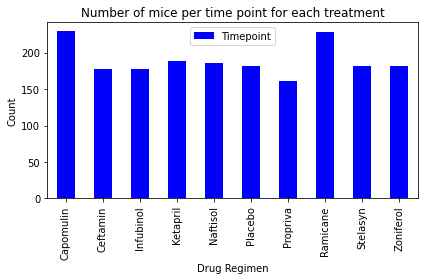

In [186]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Create a dataframe grouping by treatment
drug_regimen = combined_results_df.groupby('Drug Regimen')

#Dataframe to count the number of mice per time point
mice_count = pd.DataFrame(drug_regimen['Timepoint'].count())


#Create bar plot 
count_per_timepoint = mice_count.plot(kind='bar', title="Number of mice per time point for each treatment", color="blue")

#Set x and y labels
count_per_timepoint.set_xlabel("Drug Regimen")
count_per_timepoint.set_ylabel("Count")

#Print out the bar chart
plt.tight_layout()
plt.savefig("Images/mice_count_treatment.png")
plt.show()

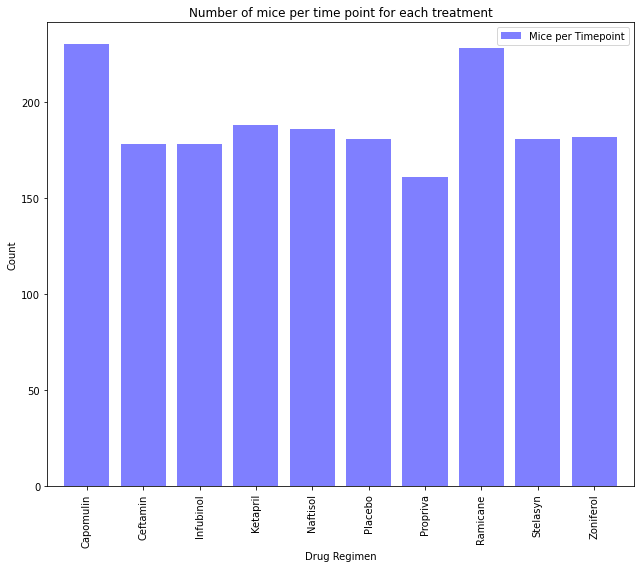

In [187]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Use information above
#Set x axis and tick locations
x_axis = np.arange(len(mice_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, mice_count["Timepoint"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, list(mice_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_count["Timepoint"])*1.05)

#Set a Title and labels
plt.title("Number of mice per time point for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#Create a legend
legend_name = ["Mice per Timepoint"]
plt.legend(legend_name,loc="best")


# Save the figure
plt.tight_layout()
plt.savefig("Images/mice_count_treatment_2.png")
plt.show()





## Pie Plots

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create dataframe to group mice by gender
gender_df = combined_results_df.groupby('Sex')

#Create dataframe to group mice by gender count
gender_count_df = pd.DataFrame(gender_df['Sex'].count())


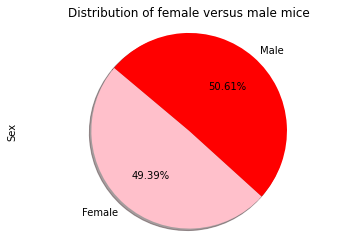

In [189]:
#Create pie chart with new dataframe
gender_count_df.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%.2f%%',shadow=True, colors =["pink","red"],legend =False)

#Create the pie chart
plt.axis("equal")
plt.savefig("Images/pie_chart_by_gender.png")
plt.show()

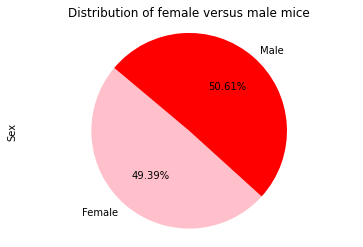

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels for the sections of pie chart
gender = ["Female", "Male"]

#The values of each section of the pie chart
gender_count = gender_count_df['Sex']

#The colors of each section of the pie chart
colors = ["pink", "red"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%.2f%%", startangle=140)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Images/pie_chart_by_gender_2.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Create list of four most promising treatment regimens
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create dataframe for list of treatments - inspired by using isin from https://realpython.com/fast-flexible-pandas/
treatment_data_df = combined_results_df[combined_results_df["Drug Regimen"].isin(treatment_list)]
max_timepoint_df = treatment_data_df.groupby(['Mouse ID']).max()

max_timepoint_df=max_timepoint_df.reset_index()
max_timepoint_df
final_df=max_timepoint_df[['Mouse ID', 'Timepoint']].merge (combined_results_df,on=['Mouse ID', 'Timepoint'], how='left')
final_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [192]:
#Create a dataframe grouping the information by Mouse Id and Drug Regimen to get the first tumor per mouse and per treatment

min_timepoint_df = treatment_data_df.groupby(['Mouse ID']).min()

min_timepoint_df=min_timepoint_df.reset_index()
min_timepoint_df
final_min_df=min_timepoint_df[['Mouse ID', 'Timepoint']].merge (combined_results_df,on=['Mouse ID', 'Timepoint'], how='left')
final_min_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a275,0,Ceftamin,Female,20,28,45.0,0
3,a411,0,Ramicane,Male,3,22,45.0,0
4,a444,0,Ramicane,Female,10,25,45.0,0
...,...,...,...,...,...,...,...,...
95,y769,0,Ceftamin,Female,6,27,45.0,0
96,y793,0,Capomulin,Male,17,17,45.0,0
97,y865,0,Ceftamin,Male,23,26,45.0,0
98,z578,0,Ramicane,Male,11,16,45.0,0


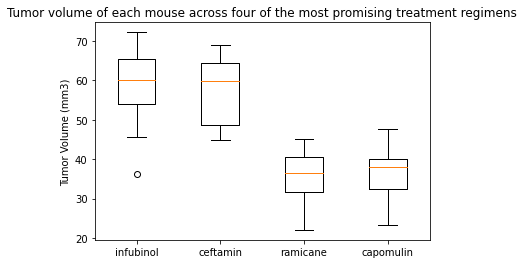

In [193]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
infubinol=final_df.loc[final_df['Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
ceftamin=final_df.loc[final_df['Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']
ramicane=final_df.loc[final_df['Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
capomulin=final_df.loc[final_df['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume of each mouse across four of the most promising treatment regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([infubinol,ceftamin, ramicane,capomulin], labels=['infubinol','ceftamin', 'ramicane','capomulin'])
plt.savefig("Images/box_plot.png")
plt.show()

## Line and Scatter Plots

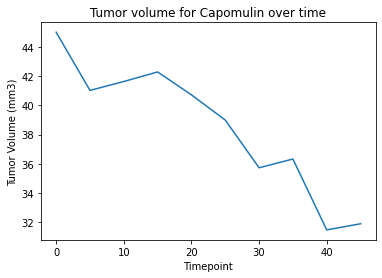

In [214]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=combined_results_df.loc[combined_results_df['Drug Regimen']=='Capomulin']
mousey793=capomulin.loc[capomulin['Mouse ID']== 'y793']
tumor_over_time = mousey793.groupby(['Timepoint']).agg(\
                Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean))
tumor_over_time
x_axis = tumor_over_time
m_793 = tumor_over_time
plt.title("Tumor volume for Capomulin over time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(tumor_over_time)
plt.savefig("Images/line_chart.png")
plt.show()

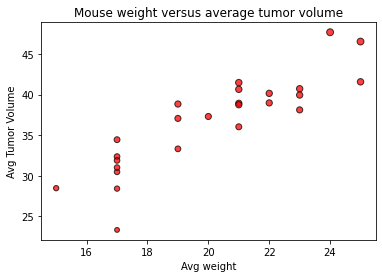

In [195]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_weight_tum_vol = capomulin.groupby(['Mouse ID']).agg(\
                Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                weight = ('Weight (g)', np.mean))

plt.scatter(avg_weight_tum_vol['weight'], avg_weight_tum_vol['Tumor_Vol_Mean'], marker="o", facecolors="red", edgecolors="black",
            s=avg_weight_tum_vol['Tumor_Vol_Mean'], alpha=0.75)
plt.title("Mouse weight versus average tumor volume")
plt.xlabel("Avg weight")
plt.ylabel("Avg Tumor Volume")
plt.savefig("Images/scatter_plot")
plt.show()

## Correlation and Regression

In [196]:
# Calculate the correlation coefficient and linear regression model 
avg_weight_tum_vol = capomulin.groupby(['Mouse ID']).agg(\
                Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                weight = ('Weight (g)', np.mean))
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(avg_weight_tum_vol['weight'],avg_weight_tum_vol['Tumor_Vol_Mean'])[0],2)}")


The correlation coefficient between weight and average tumor volume is 0.88


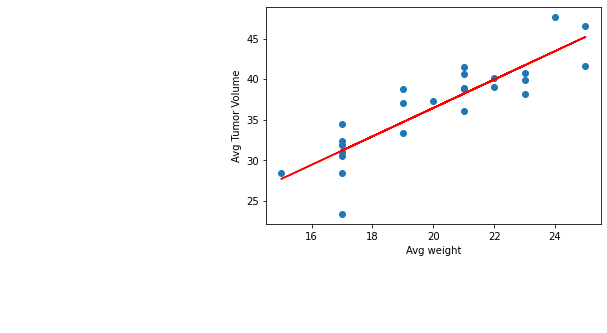

In [198]:
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_weight_tum_vol['weight']
y_values = avg_weight_tum_vol['Tumor_Vol_Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Avg weight")
plt.ylabel("Avg Tumor Volume")
plt.savefig("Images/c_l_regression")
plt.show()